In [1]:
#import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
#read dataset from Zillow.com and create dataframe
metro_df = pd.read_csv("buyer_seller_county.csv",encoding='latin1')

metro_df

,RegionName,MSA,2015-1,2015-2,2015-3,2015-4,2015-5,2015-6,2015-7,2015-8,...,2019-2,2019-3,2019-4,2019-5,2019-6,2019-7,2019-8,2019-9,2019-10,2019-11
0,Fulton County,Atlanta-Sandy Springs-Roswell,6.51,6.88,7.71,7.52,7.34,6.70,6.42,6.24,...,7.98,7.80,6.33,5.50,4.95,4.40,3.58,3.12,3.03,2.94
1,Gwinnett County,Atlanta-Sandy Springs-Roswell,2.84,3.12,3.03,3.30,3.67,4.59,5.50,5.60,...,8.62,8.72,8.26,8.07,7.89,7.71,7.61,7.52,7.34,7.16
2,Dekalb County,Atlanta-Sandy Springs-Roswell,4.22,4.04,4.50,5.78,7.06,7.43,6.97,6.33,...,8.26,7.89,7.16,6.61,6.42,6.24,5.96,5.87,5.69,5.50
3,Cobb County,Atlanta-Sandy Springs-Roswell,3.49,4.50,4.95,5.14,5.60,5.23,5.32,5.41,...,8.90,8.81,8.72,8.44,8.17,7.80,7.71,6.97,7.06,7.43
4,Clayton County,Atlanta-Sandy Springs-Roswell,5.69,4.95,4.59,4.50,4.31,4.22,3.94,3.58,...,9.54,9.17,9.08,8.62,8.17,8.44,8.26,8.53,7.52,7.61
5,Cherokee County,Atlanta-Sandy Springs-Roswell,3.67,3.76,4.04,4.22,4.50,4.86,4.95,5.41,...,7.80,8.26,8.35,8.07,7.89,8.17,8.62,8.53,8.72,8.90
6,Forsyth County,Atlanta-Sandy Springs-Roswell,4.77,5.78,6.15,6.51,6.79,7.16,7.43,7.71,...,2.84,2.94,3.03,3.30,3.39,3.49,3.67,3.85,3.76,3.58
7,Douglas County,Atlanta-Sandy Springs-Roswell,5.78,5.32,4.59,3.85,3.03,2.48,2.39,2.94,...,9.54,9.45,9.91,10.00,9.82,9.08,8.90,8.44,8.07,7.71
8,Coweta County,Atlanta-Sandy Springs-Roswell,3.76,5.05,6.06,7.25,7.61,7.06,5.78,5.41,...,9.27,8.26,8.72,8.44,8.81,8.53,8.35,7.71,7.34,8.62
9,Fayette County,Atlanta-Sandy Springs-Roswell,4.40,4.13,4.95,5.78,8.26,8.81,7.80,6.51,...,8.35,6.61,6.79,7.06,7.52,6.97,6.42,6.06,6.33,7.71


In [3]:
# Transpose dataset for better manipulation
county_pivot = metro_df.transpose().reset_index()
county_pivot.head()

,index,0,1,2,3,4,5,6,7,8,9
0,RegionName,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
1,MSA,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell
2,2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.4
3,2015-2,6.88,3.12,4.04,4.5,4.95,3.76,5.78,5.32,5.05,4.13
4,2015-3,7.71,3.03,4.5,4.95,4.59,4.04,6.15,4.59,6.06,4.95


In [4]:
# Notice output of previous step. The first row needs to be header.
county_pivot.columns = county_pivot.iloc[0]
county_pivot.head()

,RegionName,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
0,RegionName,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
1,MSA,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell
2,2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.4
3,2015-2,6.88,3.12,4.04,4.5,4.95,3.76,5.78,5.32,5.05,4.13
4,2015-3,7.71,3.03,4.5,4.95,4.59,4.04,6.15,4.59,6.06,4.95


In [5]:
# update header of Year-Month column
county_pivot = county_pivot.rename(columns={"RegionName":"Period"})
county_pivot.head()

,Period,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
0,RegionName,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
1,MSA,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell,Atlanta-Sandy Springs-Roswell
2,2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.4
3,2015-2,6.88,3.12,4.04,4.5,4.95,3.76,5.78,5.32,5.05,4.13
4,2015-3,7.71,3.03,4.5,4.95,4.59,4.04,6.15,4.59,6.06,4.95


In [6]:
# drop the first row since that has now become the column names.
county_pivot = county_pivot.drop(0)
county_pivot = county_pivot.drop(1)
county_pivot.head()

,Period,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
2,2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.4
3,2015-2,6.88,3.12,4.04,4.5,4.95,3.76,5.78,5.32,5.05,4.13
4,2015-3,7.71,3.03,4.5,4.95,4.59,4.04,6.15,4.59,6.06,4.95
5,2015-4,7.52,3.3,5.78,5.14,4.5,4.22,6.51,3.85,7.25,5.78
6,2015-5,7.34,3.67,7.06,5.6,4.31,4.5,6.79,3.03,7.61,8.26


In [7]:
# add Year column to calculate mean by year
# county_pivot['Year'] = county_pivot['Period'].str[0:4]
# county_pivot.head()
county_pivot = county_pivot.set_index("Period")
county_pivot.head()

,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
Period,,,,,,,,,,
2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.4
2015-2,6.88,3.12,4.04,4.5,4.95,3.76,5.78,5.32,5.05,4.13
2015-3,7.71,3.03,4.5,4.95,4.59,4.04,6.15,4.59,6.06,4.95
2015-4,7.52,3.3,5.78,5.14,4.5,4.22,6.51,3.85,7.25,5.78
2015-5,7.34,3.67,7.06,5.6,4.31,4.5,6.79,3.03,7.61,8.26


In [8]:
# rearrange columns for better readability
# county_pivot = county_pivot[['Year','Period','Fulton County', 'Douglas County', 'Cobb County', 'Cherokee County', 'Forsyth County', 'Gwinnett County', \
#                                         'Dekalb County', 'Clayton County', 'Fayette County', 'Coweta County']]
# county_pivot.head()

In [9]:
# transpose converted the float data into Object.  Convert them back to numeric
county_pivot['Fulton County'] = pd.to_numeric(county_pivot['Fulton County'])
county_pivot['Douglas County'] = pd.to_numeric(county_pivot['Douglas County'])
county_pivot['Cobb County'] = pd.to_numeric(county_pivot['Cobb County'])
county_pivot['Cherokee County'] = pd.to_numeric(county_pivot['Cherokee County'])
county_pivot['Forsyth County'] = pd.to_numeric(county_pivot['Forsyth County'])
county_pivot['Gwinnett County'] = pd.to_numeric(county_pivot['Gwinnett County'])
county_pivot['Dekalb County'] = pd.to_numeric(county_pivot['Dekalb County'])
county_pivot['Clayton County'] = pd.to_numeric(county_pivot['Clayton County'])
county_pivot['Fayette County'] = pd.to_numeric(county_pivot['Fayette County'])
county_pivot['Coweta County'] = pd.to_numeric(county_pivot['Coweta County'])


#calculate average house prices by year for each county
# county_avg_df = county_pivot.groupby(['Year']).mean()
county_pivot.head()

,Fulton County,Gwinnett County,Dekalb County,Cobb County,Clayton County,Cherokee County,Forsyth County,Douglas County,Coweta County,Fayette County
Period,,,,,,,,,,
2015-1,6.51,2.84,4.22,3.49,5.69,3.67,4.77,5.78,3.76,4.40
2015-2,6.88,3.12,4.04,4.50,4.95,3.76,5.78,5.32,5.05,4.13
2015-3,7.71,3.03,4.50,4.95,4.59,4.04,6.15,4.59,6.06,4.95
2015-4,7.52,3.30,5.78,5.14,4.50,4.22,6.51,3.85,7.25,5.78
2015-5,7.34,3.67,7.06,5.60,4.31,4.50,6.79,3.03,7.61,8.26


In [10]:
county_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 2015-1 to 2019-11
Data columns (total 10 columns):
Fulton County      59 non-null float64
Gwinnett County    59 non-null float64
Dekalb County      59 non-null float64
Cobb County        59 non-null float64
Clayton County     59 non-null float64
Cherokee County    59 non-null float64
Forsyth County     59 non-null float64
Douglas County     59 non-null float64
Coweta County      59 non-null float64
Fayette County     59 non-null float64
dtypes: float64(10)
memory usage: 5.1+ KB


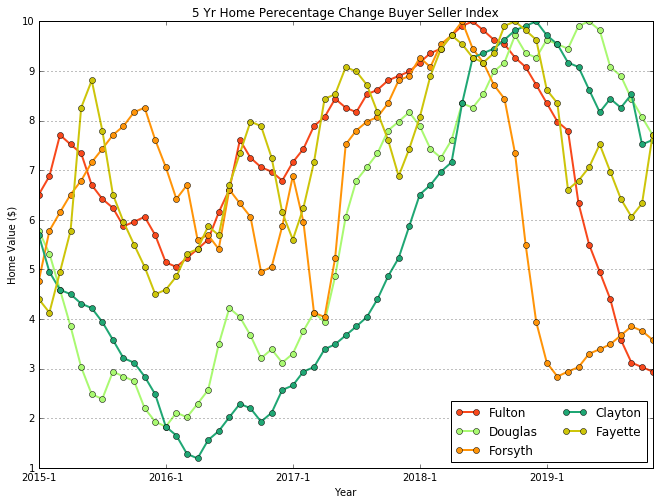

In [12]:
# Generate the Plot
# Setting up the plot and its size

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(11,8)



# colors from https://xkcd.com/color/rgb/
Fulton, = plt.plot(county_pivot.index, county_pivot['Fulton County'], marker='o', color="#f8481c", linewidth=2, label="Fulton") # reddish orange
Douglas, = plt.plot(county_pivot.index, county_pivot['Douglas County'], marker='o', color="#a9f971", linewidth=2, label="Douglas") # spring green
# Cobb, = plt.plot(county_pivot.index, county_pivot['Cobb County'], marker='o', color="#5170d7", linewidth=2, label="Cobb") # cornflower blue
# Cherokee, = plt.plot(county_pivot.index, county_pivot['Cherokee County'], marker='o', color="#40a368", linewidth=2, label="Cherokee") # greenish
Forsyth, = plt.plot(county_pivot.index, county_pivot['Forsyth County'], marker='o', color="#ff9408", linewidth=2, label="Forsyth") # tangerine
# Gwinnett, = plt.plot(county_pivot.index, county_pivot['Gwinnett County'], marker='o', color="#8b2e16", linewidth=2, label="Gwinnett") # red brown
# Dekalb, = plt.plot(county_pivot.index, county_pivot['Dekalb County'], marker='o', color="#d648d7", linewidth=2, label="Dekalb") # pinkish purple
Clayton, = plt.plot(county_pivot.index, county_pivot['Clayton County'], marker='o', color="#1fa774", linewidth=2, label="Clayton") # jade
Fayette, = plt.plot(county_pivot.index, county_pivot['Fayette County'], marker='o', color="#cdc50a", linewidth=2, label="Fayette")# dirty yellow
# Coweta, = plt.plot(county_pivot.index, county_pivot['Coweta County'], marker='o', color="#77926f", linewidth=2, label="Coweta") # green grey

# Add labels to the x and y axes
plt.title("5 Yr Home Perecentage Change Buyer Seller Index")
plt.xticks([0, 12, 24, 36, 48])


plt.xlabel("Year")
plt.ylabel("Home Value ($)")
plt.grid(axis='y')

# Create a legend for the chart
plt.legend(handles=[Fulton, Douglas, Forsyth, Clayton, Fayette],  loc="best", ncol=2)

# Save the Figure
plt.savefig("CountyBSIChange.png")

# Show the Figure
plt.show()

In [ ]:
# Calculate Home Value growth by Counties

pct_fulton = round(((county_avg_df['Fulton County'].iloc[-1] / county_avg_df['Fulton County'].iloc[0] - 1) * 100), 1)
pct_douglas = round(((county_avg_df['Douglas County'].iloc[-1] / county_avg_df['Douglas County'].iloc[0] - 1) * 100), 1)
pct_cobb = round(((county_avg_df['Cobb County'].iloc[-1] / county_avg_df['Cobb County'].iloc[0] - 1) * 100), 1)
pct_forsyth = round(((county_avg_df['Forsyth County'].iloc[-1] / county_avg_df['Forsyth County'].iloc[0] - 1) * 100), 1)
pct_cherokee = round(((county_avg_df['Cherokee County'].iloc[-1] / county_avg_df['Cherokee County'].iloc[0] - 1) * 100), 1)
pct_gwinnett = round(((county_avg_df['Gwinnett County'].iloc[-1] / county_avg_df['Gwinnett County'].iloc[0] - 1) * 100), 1)
pct_dekalb = round(((county_avg_df['Dekalb County'].iloc[-1] / county_avg_df['Dekalb County'].iloc[0] - 1) * 100), 1)
pct_clayton = round(((county_avg_df['Clayton County'].iloc[-1] / county_avg_df['Clayton County'].iloc[0] - 1) * 100), 1)
pct_fayette = round(((county_avg_df['Fayette County'].iloc[-1] / county_avg_df['Fayette County'].iloc[0] - 1) * 100), 1)
pct_coweta = round(((county_avg_df['Coweta County'].iloc[-1] / county_avg_df['Coweta County'].iloc[0] - 1) * 100), 1)

pct_change_y = [pct_fulton, pct_douglas, pct_cobb, pct_forsyth, pct_cherokee, pct_gwinnett, pct_dekalb, pct_clayton, pct_fayette, pct_coweta]
pct_change_x = ['Fulton', 'Douglas', 'Cobb', 'Cherokee', 'Forsyth', 'Gwinnett', 'Dekalb', 'Clayton', 'Fayette', 'Coweta']

In [ ]:
fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(11,8)

change_plt = plt.bar(pct_change_x, pct_change_y)

# set plot color
change_plt[0].set_color('#f8481c')
change_plt[1].set_color('#a9f971')
change_plt[2].set_color('#5170d7')
change_plt[3].set_color('#40a368')
change_plt[4].set_color('#ff9408')
change_plt[5].set_color('#8b2e16')
change_plt[6].set_color('#d648d7')
change_plt[7].set_color('#1fa774')
change_plt[8].set_color('#cdc50a')
change_plt[9].set_color('#77926f')

# Add labels to the x and y axes
plt.title("5 Yr Growth of Home Values in Metro Atlanta Counties")
plt.xlabel("Counties")
plt.ylabel("Gowth (%)")

# Use functions to label the percentages of changes
# Reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(bars):
    for i in bars:
        height = i.get_height()
        if height > 0:
            label_position = i.get_height()/2. # bottom left of text position
        else:
            label_position = -10 # bottom left of text position
            
        plt.text(i.get_x() + i.get_width()/2., label_position,
                str(height)+ '%' ,color='black', ha='center')

# Call functions to implement the function calls
autolabel(change_plt)

# Save the Figure
plt.savefig("CountyHomeValueGrowth.png")